# Estudo de estatística com python

Estudos baseados no livro Estatística Básica de Wilton de O. Bussab e Pedro A. Morettin

Os dados utilizados se encontram em https://www.ime.usp.br/~pam/EstBas.html

## 1 - Importações de bibliotecas importantes para as análises

In [49]:
#Importação de bibliotecas
import pandas as pd
import sklearn as skl
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

Resumo dos símbolos matematicos utilizados

$\bar x$ -> Média da amostra X (Fala-se X Barra)

$\mathrm\sum_{i=2}^{5} 2^i$ -> Símbolo de somatória o valor abaixo do símbolo é a posição inicial da somatória e o valor

acima é o final. Nesse caso ficaria $2^2 + 2^3 + 2^4 + 2^5$

$\begin{vmatrix} x \end{vmatrix}$ -> Módulo de X.

## 2 - Resumo de Dados

### 2.1 - Tipos de Variáveis

Para esta parte utilizaremos a base de dados Tabela 2.1 que contém dados dos funcionarios de uma empresa

In [4]:
# Lendo a tabela 2.1 do arquivo CSV
df_tabela_2_1 = pd.read_csv(filepath_or_buffer="./Data/Tabela 2.1.csv",encoding='latin1',delimiter=';')
#Transformando a coluna Salario(x Sal Min) em tipo float
df_tabela_2_1['Salario (x Sal Min)'] = df_tabela_2_1['Salario (x Sal Min)'].str.replace(',','.')
df_tabela_2_1['Salario (x Sal Min)'] = df_tabela_2_1['Salario (x Sal Min)'].astype(float)


In [5]:
# 5 Primeiras 5 aparições da Tabela 2.1
df_tabela_2_1.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,solteiro,ensino fundamental,NaN,4.00,26,3,interior
1,casado,ensino fundamental,1.0,4.56,32,10,capital
2,casado,ensino fundamental,2.0,5.25,36,5,capital
3,solteiro,ensino médio,NaN,5.73,20,10,outra
4,solteiro,ensino fundamental,NaN,6.26,40,7,outra


Existem 7 variáveis no estudo.

-   Estado Civil -> Solteiro ou Casado

-   Grau de Instrução -> Ensino Fundamental, Ensino médio ou Ensino Superior

-   N de Filhos -> Quantidade de filhos

-   Salario(x Sal Min) -> Número de salários multiplicados pelo salário mínimo vigente

-   Anos -> Idade da pessoa em anos completos

-   Meses -> Idade da pessoa meses completos

-   Região de Procedência -> Interior, Capital ou outra

#### Tipos de variáveis

**Quantitativas** -> Apresentam possíveis realizações números resultantes de contagens ou mensurações. 

    Exemplos: Número de Filhos, Salário, Idade em anos e Meses.

**Qualitativas** -> Apresentam como possíveis realizações uma qualidade (ou atributo) do indivíduo pesquisado. 

    Exemplos: Estado Civil, Grau de instrução, Região de Procedência.

#### Variáveis Quantitativas


Variáveis quantitativas podem ser dividas em dois grupos

**Variáveis quantitativas discretas** -> Os valores formam um conjunto finito ou enumerável de números, que resultam frequentemente em uma contagem.

    Exemplos: Número de Filhos (1,2,3,...n), Idade completa em anos

**Variáveis quantitativas contínuas** -> Os valores pertencem a um intervalo de números reais e que resultam de uma mensuração.

    Exemplos: Salário, Idade medida em anos e meses

#### Variáveis Qualitativas

Variáveis qualitativas também se dividem em dois grupos

**Variáveis Qualitativas Nominais** -> Variáveis para qual não existe nenhum tipo de ordenação.

    Exemplo: Estado Civil, Região de procedência

**Variáveis Qualitativas Ordinais** -> Variáveis para qual existe uma ordem no seu resultado

    Exemplo: Grau de instrução (O mais baixo é o nível fundamental, médio, superior e assim por diante)

<center><img src="https://www.inf.ufsc.br/~andre.zibetti/probabilidade/img/classificacao_variaveis.png"/></center>

### 2.2 Distribuição de frequências

Quando se estuda uma variável, o maior interesse é conhecer o comportamento dessa variável, analisando a ocorrência de suas possíveis realizações.

In [6]:
#Frequência (absoluta) do Grau de instrução (n1)
df_tabela_2_1['Grau de Instrução'].value_counts()

ensino médio          18
ensino fundamental    12
superior               6
Name: Grau de Instrução, dtype: int64

In [7]:
#Proporção do grau de instrução ou frequência relativa (fi = n1/n)
df_tabela_2_1['Grau de Instrução'].value_counts()/df_tabela_2_1['Grau de Instrução'].count()

ensino médio          0.500000
ensino fundamental    0.333333
superior              0.166667
Name: Grau de Instrução, dtype: float64

In [8]:
#Proporção do grau de instrução em porcentagem ()
(df_tabela_2_1['Grau de Instrução'].value_counts()/df_tabela_2_1['Grau de Instrução'].count())*100

ensino médio          50.000000
ensino fundamental    33.333333
superior              16.666667
Name: Grau de Instrução, dtype: float64

Observando os resultados vê-se que dos 36 empregados da companhia 12 tem ensino fundamental, 18 médio e 6 superior.

Uma maneira útil de analisarmos esses dados é dividindo o valor de cada variável pelo total obtendo uma proporção em relação ao total da amostra.

Multiplicando por 100 temos o percentual relativo daquela variável.

### 2.3 Escala de medidas

Escalas de medidas são critérios para classificas variáveis, em função da escala adotada. Existem quatro escalas que podem ser consideradas

-   **Escala Nominal** -> Escala nominal permite apenas identificar se uma medida é diferente da outra, assemelha-se ao boolean ou relação binária. Exemplo, uma variável sexo onde existem Masculino ou Feminino sendo masculino 1 e feminino 0, ou M e F e assim por diante.

Medidas de posição apropriadas são: Moda
  
-   **Escala Ordinal** ->  De forma semelhante a Escala nominal definimos um número para a medida, porém, dessa vez a há uma ordenação na escala. Por exemplo o grau de instrução, onde 1 é o Ensino Fundamental, 2 o Ensino Médio e 3 o Ensino Superior. Dessa forma temos 3>2>1

Medidas de posição apropriadas são: Mediana e Moda

-   **Escala Intervalar** -> Nesta escala podemos afirmar que uma medida é igual ou diferente de outra, maior e o quanto maior que outra. Podemos quantificar a diferença da escala ordinal. É necessário uma origem arbitrária e uma unidade de medida. Exemplo, 0ºF é a origem e 1ºF é a unidade da escala de graus Fahrenheit. 0ºC não é igual a 0ºF. Para compararmos as duas medidas precisamos de uma transformação, no caso para transformar F em C é preciso usar a formula y=5/9(x-32)

Medidas de posição apropriadas são: Média, mediana e moda.  

-   **Escala Razão** -> Nesta escala semelhante a escala intervalar é possível comparar medidas, se são iguais, maiores, o quanto maiores e quantas vezes maior. A diferença principal é que a Escala razão possui um zero absoluto. Por exemplo, a unidade de medida da altura é o cm. Todas as alturas começam em 0 cm. Mesmo alterando a unidade para metros as equivalências e comparações permanecem.

Medidas de posição apropriadas são: Média, mediana e moda. 

### 2.4 Gráficos

#### 2.4.1 Gráficos para Variáveis Qualitativas

Para variáveis quantitativas há diversas formas de se representar o mesmo princípio.

Gráficos de barra (Bar plot)

<AxesSubplot:xlabel='Grau de Instrução', ylabel='count'>

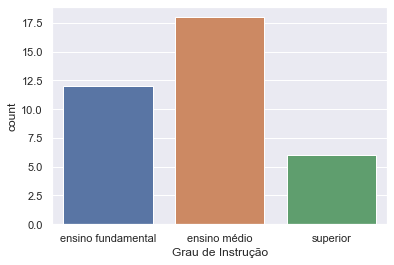

In [9]:
#Setando o estilo do tema do gráfico
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
sns.countplot(data = df_tabela_2_1, x = 'Grau de Instrução')

Gráfico de setores ou gráfico de pizza (Pie Chart)

([<matplotlib.patches.Wedge at 0x26c020461f0>,
 [Text(6.735557395310444e-17, 1.1, 'ensino médio'),
  Text(-0.5499999702695119, -0.9526279613277874, 'ensino fundamental'),
  Text(0.9526279870751432, -0.5499999256737775, 'superior')])

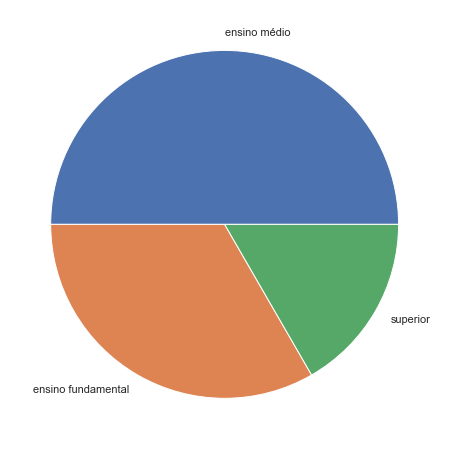

In [10]:
#Setando o estilo do tema do gráfico
sns.set_theme(style="darkgrid")

df_count_grau_instrucao = df_tabela_2_1['Grau de Instrução'].value_counts().to_frame().reset_index()

#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
plt.pie(x = df_count_grau_instrucao['Grau de Instrução'],labels=df_count_grau_instrucao['index'])


#doc: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#### 2.4.1 Gráfico para variáveis quantitativas

Para variáveis quantitativas, podemos considerar uma variade maior de representações gráficas

Gráfico de barras

<AxesSubplot:xlabel='N de Filhos', ylabel='count'>

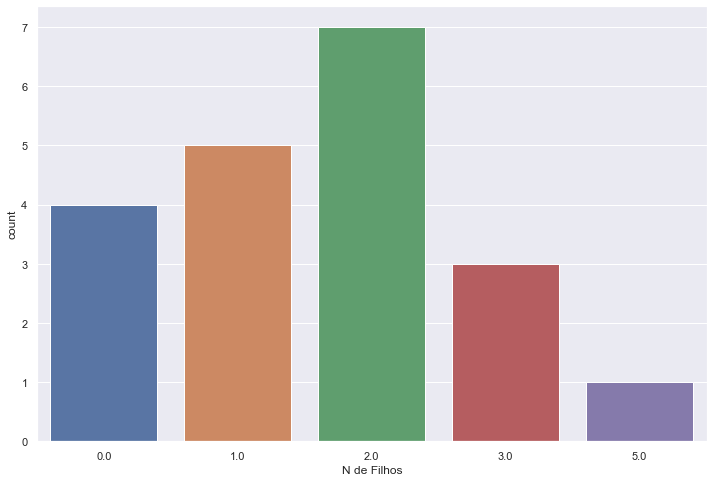

In [11]:
# Gráfico de barras para variável quantitativa discreta
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
sns.countplot(data = df_tabela_2_1, x = 'N de Filhos')

Gráfico de dispersão unidimensional

<AxesSubplot:ylabel='N de Filhos'>

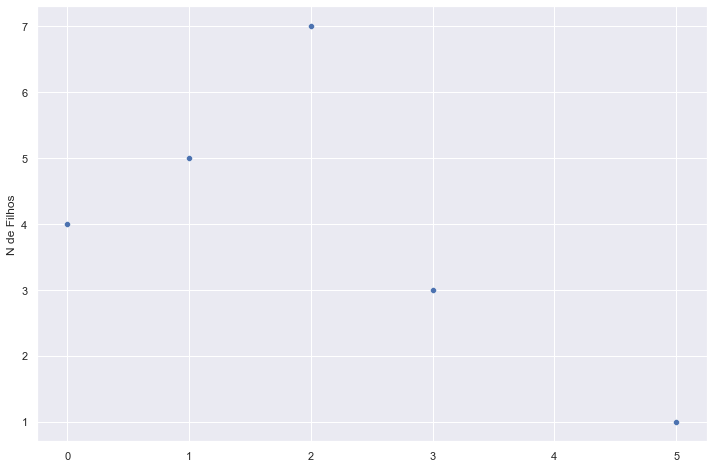

In [12]:
# Gráfico de dispersão unidimensional plotando apenas o valor máximo de cada variável
sns.set_theme(style="darkgrid")
#Fazendo um plot de um gráfico de barras com a contagem de cada variável qualitativa da coluna Grau de instrução
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_tabela_2_1['N de Filhos'].value_counts().index, y = df_tabela_2_1['N de Filhos'].value_counts())

Histograma

<AxesSubplot:xlabel='Classe de Salários', ylabel='Count'>

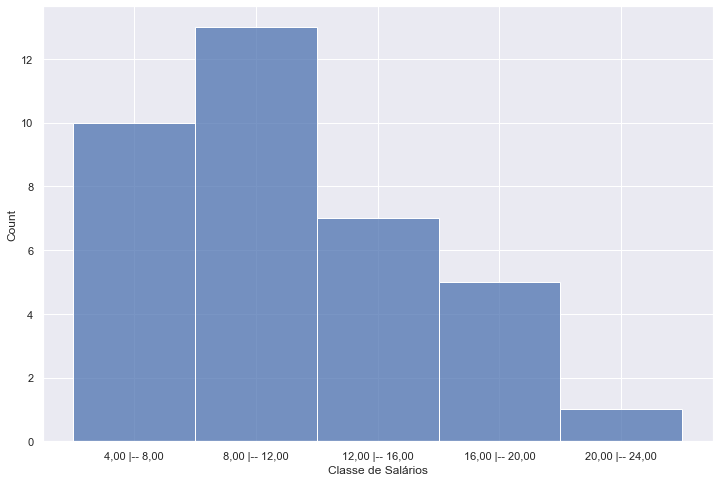

In [13]:
#Criando uma classe para os salarios com amplitude de 4
df_tabela_2_1['Classe de Salários'] = pd.cut(x =df_tabela_2_1['Salario (x Sal Min)'], bins = [4,8,12,16,20,24], labels = ['4,00 |-- 8,00','8,00 |-- 12,00','12,00 |-- 16,00','16,00 |-- 20,00','20,00 |-- 24,00'],include_lowest = True)
#Gráfico para variável quantitativa contínua
plt.figure(figsize=(12,8))
sns.histplot(data = df_tabela_2_1, x = 'Classe de Salários')

## 3 - Medidas-Resumo

### 3.1 - Medidas de Posição

Muitas vezes é necessário resumir os dados, apresentando um ou alguns valores que sejam representativos da série toda.
Usualmente, emprega-se uma das seguintes medidas de posição (ou localização) central:

    - Média
    - Mediana
    - Moda

- **Moda** -> É definida como a realização mais frquente do conjunto de valores observados. Por exemplo, considere a variável Z, número de filhos de cada funcionário casado, resumida no df_tabela_2_1. Vemos que a moda é 2, correspondente a realização com maior frequência (aparece 7 vezes). Em alguns casos, pode haver mais de uma moda, ou seja, a distribuição dos valores pode ser bimodal,trimodal,etc.

In [14]:
#Agrupando os valores da coluna Estado Civil e agregando os valores da coluna N de Filhos pela moda
print(f"A moda da variável filhos para as pessoas de estado civil casado é: {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.mode)[0]}")
print(f"A frequência de vezes que esse valor aparece é de : {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].value_counts().max()}")

A moda da variável filhos para as pessoas de estado civil casado é: 2.0
A frequência de vezes que esse valor aparece é de : 7


- **Mediana** -> É a realização que ocupa a posição central das observações, quando estão ordenadas em ordem crescente. Assim, se as cinco observações de uma variável forem 3, 4,7, 8 e 8, a mediana é o valor 7, correspondente à terceira observação. Quando o número de observações for par, usa-se como mediana a média aritmética das duas observações centrais. Acrescentando-se o valor 9 a série acima, a mediana será (7 + 8)/2 = 7,5

Para os valores de filhos das pessoas casadas do df_tabela_2_1 a mediana também é 2.

In [15]:
#Agrupando os valores da coluna Estado Civil e agregando os valores da coluna N de Filhos pela mediana
print(f"A mediana da variável filhos para as pessoas de estado civil casado é: {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.median)[0]}")

A mediana da variável filhos para as pessoas de estado civil casado é: 2.0


Média Aritmética -> É a soma das observações dividida pelo número delas.

$$\dfrac{4*0+5*1+7*2+3*3+5*1}{20} = \dfrac{33}{20} = 1.65 $$

In [16]:
#Calculo da média aritmética
print(f"A média aritmética da variável filhos para as pessoas de estado civil casado é: {df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.mean)[0]}")

A média aritmética da variável filhos para as pessoas de estado civil casado é: 1.65


**Formalizando os conceitos**

se $x1,...xn$ são os n valores (distintos ou não) da variável X, a média aritmética ou simplesmente média, de X pode ser descrita como:

$$\dfrac{ x1 + ... + xn}{n} = \dfrac{1}{n} \mathrm\sum_{i=1}^{n} xi$$

Agora se tiverem $n$ observações da variável X, das quais $n1$ são iguaisa $x1$, n2 são iguais a $x2$ etc., $nk$ iguais a $x1$, então a média de X pode ser descrita

$$\bar x = \dfrac{ n1x1 + n2x2 ... + nkxk}{n} = \dfrac{1}{n} \mathrm\sum_{i=1}^{k} nixi$$

Se $fi = ni/n$ representar a frequência relativa da observação $xi$, então a equação anterior também pode ser escrita como

$$\bar x = \mathrm\sum_{i=1}^{k} fixi$$

Consideramos, agora, as observações ordenadas em ordem crescente. Vamos denotar a menor observação por $x(1)$, a segunda por $x(2)$ e assim por diante, obtendo-se

$$ x(1) \leq x(2) \leq ... \leq x(n-1) \leq x(n)$$

Por exemplo, se $x_1$ = 3, $x_2$ = -2, $x_3$ = 6, $x_4$ = 1, $x_5$ = 3, então $-2 \leq 1 \leq 3 \leq 3 \leq 6$, de modo que $x_1 = -2, x_2 = 1, x_3 = 3, x_4 = 3 , x_5 = 6$.

As observações ordenadads como a equação anterior são chamadas de *estatísticas de ordem*.




### 3.2 - Medidas de Dispersão

O resumo de um conjunto de dados por uma única medida representativa de posição central esconde toda a informação sobre a variabilidade do conjunto de observações. Por exemplo, suponhamos que cinco grupos de alunos submeteram-se a um teste, no qual obtiveram as seguintes notas:

Grupo A (Variável X) -> 3,4,5,6,7

Grupo B (Variável Y) -> 1,3,5,7,9

Grupo C (Variável Z) -> 5,5,5,5,5

Grupo D (Variável W) -> 3,5,5,7

Grupo E (Variável V) -> 3,5,5,6,6


In [17]:
#Calculo das médias
print(f"Média Grupo A: {np.mean([3,4,5,6,7])}")
print(f"Média Grupo B: {np.mean([1,3,5,7,9])}")
print(f"Média Grupo C: {np.mean([5,5,5,5,5])}")
print(f"Média Grupo D: {np.mean([3,5,5,7])}")
print(f"Média Grupo E: {np.mean([3,5,5,6,6])}")

Média Grupo A: 5.0
Média Grupo B: 5.0
Média Grupo C: 5.0
Média Grupo D: 5.0
Média Grupo E: 5.0


Vemos que a média das cinco distribuições é igual a 5 $\bar x = \bar y = \bar z = \bar w = \bar v = 5,0$.

A identificação de cada uma destas séries por sua média (5, em todos os casos) nada informa sobre suas diferentes variablidades.

Notamos então que é preciso criar medidas que nos permitam ver a variablidade de um conjunto de dados.
Um critério é aquele que mede a dispersão dos dados em torno de sua média, e duas medidas são as mais usadas: desvio médio e variância.
O princípio básico é analisar os desvios das observações em relação à média dessas observações.

Para o grupo A acima os desvios $x_i - \bar x$ são: -2, -1, 0 ,1 ,2. É fácil ver que a soma dos desvios é igual a zero.

Nessas condições a soma dos desvios $\mathrm\sum_{i=1}^{5} (x_i - \bar x)$ não é uma boa medida para o grupo A. Duas opções são: Considerar o total dos desvios em valor absoluto ou considerar o total dos quadrados dos desvios. Para o grupo A teríamos, respectivamente:

$$\mathrm\sum_{i=1}^{5} \begin{vmatrix} x_i - \bar x\end{vmatrix} = 2 + 1 + 0 + 1 + 2 = 6 $$

$$\mathrm\sum_{i=1}^{5} (x_i - \bar x)^2  = 4 + 1 + 0 + 1 + 4 = 10 $$

O uso desses totais pode causar dificuldades quando comparamos conjuntos de dados com números diferentes de observações, como os conjuntos A e D acima. Desse modo, é mais conveniente exprimir as medidas como médias, isto é, o desvio médio e a variância são definidos por

$$ dm(X) = \dfrac{\mathrm\sum_{i=1}^{n} \begin{vmatrix}  x_i - \bar x \end{vmatrix} }{n} $$

$$ var(X) = \dfrac{\mathrm\sum_{i=1}^{n} (x_i - \bar x)^2 }{n} $$

dessa forma temos para o grupo A

$$dm(X) = 6/5 = 1.2$$

$$var(X) = 10/5 = 2.0$$

Enquanto que para o grupo D teríamos

$$dm(X) = 4/4= 1.0$$

$$var(X) = 8/4 = 2.0$$

Podemos concluir que segundo o desvio médio o grupo D é mais homogêneo que o A, enquanto ambos são igualmente homogêneos segundo a variância.

Sendo a variância uma medida de dimensão igual ao quadrado da dimensão dos dados (exemplo: se os dados são expressos em cm a variância será expressa em cm²) pode causar má interpretação. Entãoi utiliza-se o desvio padrão, que é definido como a raiz quadrada positiva da variância. Para o Grupo A temos o desvio padrão de:

$$ dp(X) = \sqrt{var(x)} = \sqrt{2} = 1.41 $$

Concluindo, ambas as medidas apresentam o "erro" (desvio) cometido ao tentar substituir os valores por uma medida de resumo do conjunto. Ou seja a média do grupo A é de 5.0 com um desvio de 1.41 para cima ou para baixo.


In [23]:
#Exemplo Calculando o desvio padrão para a variável número de filhos

print(f"O desvio padrão é de {round(df_tabela_2_1.groupby(by = 'Estado Civil')['N de Filhos'].agg(pd.Series.std)[0],2)}")

O desvio padrão é de 1.27


### 3.3 - Quantis Empíricos

Tanto a média quanto o desvio padrão podem não ser medidas adequadas para representar um conjunto de dados pois:

a) São afetados de forma exagerada por valores extremos

b) Apenas com estes dois valores não é possível ter ideia da simetria ou assimetria da distribuição dos dados.

Para contornar esses fatos, outras medidas precisam ser consideradas.

Podemos definir uma medida chamada *quantil de ordem p* ou p-quantil, indicada por q(p), em que p é a proporção qualquer, 0 < p < 1, tal que 100p% das observações sejam menores que q(p). Exemplos:

q(0,25) = $q_1$ : 1º Quartil = 25º percentil -> 1º quartil da amostra p ou seja o valor que define o primeiro quartil dessa amostra

q(0,50) = $q_2$ : 2º Quartil (mediana) = 50º percentil -> Valor que define o 2º quartil da amostra p e também a mediana.

q(0,75) $q_3$ : 3º Quartil  = 75º percentil -> Valor que define o 3º quartil da amostra p.

q(0,40) $q_4$ : 4º Decil -> Assim como o quartil é divido em quatro partes o decil é divido em 10 partes da amostra.

q(0,95) $q_5$ : 95º Percentil -> Também é possível dividir em percentis ou seja em 100 partes da amostra


Para compreender melhor o motivo do uso dos quartis deve-se entender que existem medidas de localização ou dispersão resistentes. Essas medidas são resistentes, ou pouco afetadas, por mudanças de uma pequena porção dos dados (o que chamamos de outliers).

Utilizando um exemplo do livro "Como Mentir com Estatística". 

Há 5 homens em um bar. Cada um deles tem a exata mesma renda mensal de 10 mil reais.

Vamos calcular a média aritmética da renda mensal desses homens:

$$ \dfrac{10.000,00 * 5}{5} = 10.000,00 $$

Podemos ver que a média de faturamento desses homens é de 10.000,00 reais o que é uma medida extramente acertiva. Temos um desvio padrão de 0.

Nesse momento Bill Gates entra pela porta do bar com sua renda mensal de 2 bilhoes e se senta com os outros 5 homens.

A partir desse momento a renda mensal média das 6 pessoas do bar é de aproximadamente 333,400 milhões de reais.

Essa medida está completamente fora da realidade. Ou seja a média aritmética é extremamente afetada por valores fora da curva.

Já a mediana é uma medida resistente aos outliers.

Calculando a mediana das 6 pessoas no bar teremos um valor de 10.000,00 reais. O que explica muito melhor nossos dados.

É nessa parte que os quartis também entram.

O menor valor dos dados ($x_1$), $q_1$, $q_2$, $q_3$ e o maior valor dos dados ($x_n$) são importantes para saber o grau de assimetria da amostra.

Uma amostra tem a sua distribuição considerada normal ou gaussiana quando 50% das observaçoes se concentram entre o 1 e o 3 quartil. Ou seja pelo menos metade dos dados se concentra ao redor da mediana, enquanto maior a distância menor a quantidade de dados da amostra.

<center><img src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png"/></center>

Para uma distribuição simétrica ou aproximadamente simétrica deveríamos ter:

a) $q_2 - x_1 \approx x_n - q_2$

b) $q_2 - q_1 \approx q_3 - q_2$

c) $q_1 - x_1 \approx x_n - q_3$

d) Distâncias entre mediana e $q_1,q_3$ menores do que distâncias entre os extremos e $q_1,q_3$

A diferença $q_2 = x_1$ é chamada dispersão inferior e $x_n - q_2$ é a dispersão superior.

Ou seja as duas dispersões devem ser aproximadamente iguais para que uma distribuição seja aproximadamente simétrica.









In [47]:
#Exemplo prático

#Criando uma lista com valores randômicos e uma distribuição normal com a biblioteca numpy
#Definimos a média dos dados como aproximadamente 100  e o desvio padrão como aproximadamente 120, com  10000 valores.
#Essa função irá retornar uma lista com uma distribuição aproximadamente normal
s = np.random.normal(100, 120, 10000)

x1 = np.min(s)
xn = np.max(s)
q1 = np.quantile(s,0.25)
q2 = np.quantile(s,0.50)
q3 = np.quantile(s,0.75)


#Vamos calcular o valor mínimo x1 o valor maximo xn e os quartis
print(f'O valor mínimo da amostra é {x1}')
print(f'O valor máximo da amostra é {xn}')
print(f'O valor q1 da amostra é {q1}')
print(f'O valor q2 da amostra ou mediana é {q2}')
print(f'O valor q3 da amostra é {q3}')

#Vamos agora fazer as verificações para confirmar que é uma distribuição normal

#a) q2 - x1 = xn -q2
print("--------------------------------------------")
print(q2 - x1)
print(xn - q2)
print("Os valores da condição a são aproximadamente iguais")

#b) q2 - q1 = q3 - q2
print("--------------------------------------------")
print(q2 - q1)
print(q3 - q2)
print("Os valores da condição b são aproximadamente iguais")

#b) q2 - q1 = q3 - q2
print("--------------------------------------------")
print(q1 - x1)
print(xn - q3)
print("Os valores da condição c são aproximadamente iguais")




O valor mínimo da amostra é -389.47639498941
O valor máximo da amostra é 569.0817566764536
O valor q1 da amostra é 18.045971279389104
O valor q2 da amostra ou mediana é 98.97800750528663
O valor q3 da amostra é 179.8413943693439
--------------------------------------------
488.45440249469664
470.1037491711669
Os valores da condição a são aproximadamente iguais
--------------------------------------------
80.93203622589752
80.86338686405728
Os valores da condição b são aproximadamente iguais
--------------------------------------------
407.5223662687991
389.24036230710965
Os valores da condição c são aproximadamente iguais


<AxesSubplot:ylabel='Count'>

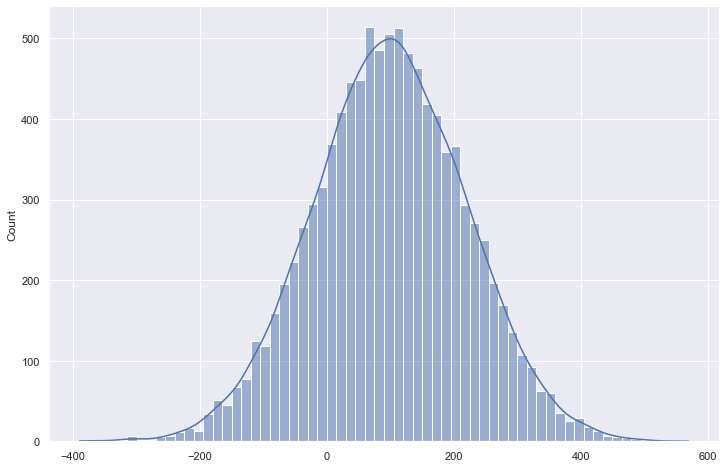

In [51]:
#plotando a distribuição s
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.histplot(s,kde = True)

### 3.4 - Box Plots